## Text data Clustering 

In [6]:
import pandas as pd


df = pd.read_csv("C:/Users/Surya/Desktop/Term 3/NLP/Classnote 18/5000_movies.csv")
df.info()

#df = pd.read_csv("5000_movies.csv")
#df.info()

#import pandas as pd

# Load Excel file
#df = pd.read_excel('file_path.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview'].map(str)
df.dropna(inplace=True)
df.head(10)

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."
5,Spider-Man 3,The battle within.,The seemingly invincible Spider-Man goes up ag...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",115.699814,The battle within. The seemingly invincible Sp...
6,Tangled,They're taking adventure to new lengths.,When the kingdom's most wanted-and most charmi...,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",48.681969,They're taking adventure to new lengths. When ...
7,Avengers: Age of Ultron,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",134.279229,A New Age Has Come. When Tony Stark tries to j...
8,Harry Potter and the Half-Blood Prince,Dark Secrets Revealed,"As Harry begins his sixth year at Hogwarts, he...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",98.885637,Dark Secrets Revealed As Harry begins his sixt...
9,Batman v Superman: Dawn of Justice,Justice or revenge,Fearing the actions of a god-like Super Hero l...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",155.790452,Justice or revenge Fearing the actions of a go...


In [8]:
df.shape

(4800, 6)

### Text pre-processing

In [9]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
norm_corpus


array(['enter world pandora 22nd century paraplegic marine dispatched moon pandora unique mission becomes torn following orders protecting alien civilization',
       'end world adventure begins captain barbossa long believed dead come back life headed edge earth turner elizabeth swann nothing quite seems',
       'plan one escapes cryptic message bonds past sends trail uncover sinister organization battles political forces keep secret service alive bond peels back layers deceit reveal terrible truth behind spectre',
       ...,
       'signed sealed delivered introduces dedicated quartet civil servants dead letter office us postal system transform elite team lostmail detectives determination deliver seemingly undeliverable takes post office unpredictable world letters packages past save lives solve crimes reunite old loves change futures arriving late always miraculously time',
       'new yorker shanghai ambitious new york attorney sam sent shanghai assignment immediately stumbles le

In [13]:
# for example 
def func(n):
    return n*n

normalize = np.vectorize(func)

norm = normalize([1,2,3,4])
print(norm)

[ 1  4  9 16]


### Use CountVectorizer to vectorize the text

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 2), min_df=20, max_df=0.8)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(4800, 1466)

from sklearn.feature_extraction.text import CountVectorizer: This line imports the CountVectorizer class from scikit-learn, which is used to convert text data into numerical feature representations.

cv = CountVectorizer(ngram_range=(1, 2), min_df=20, max_df=0.8): Here, we create a CountVectorizer object named cv. Key parameters are:

ngram_range=(1, 2): Includes both single words (unigrams) and pairs of adjacent words (bigrams) in the feature matrix.
min_df=20: Terms appearing in fewer than 20 documents are excluded from the vocabulary.
max_df=0.8: Terms occurring in more than 80% of the documents are excluded.
cv_matrix = cv.fit_transform(norm_corpus): This line transforms the normalized text corpus (norm_corpus) into a document-term matrix using the CountVectorizer object (cv). Each row represents a document, and each column represents a term, with the cell value indicating the frequency of the term in the document.

cv_matrix.shape: This line prints the shape of the resulting document-term matrix, showing the number of documents and the number of unique terms (words or n-grams) in the corpus.







In [15]:
# for example
v = CountVectorizer(ngram_range=(1, 2))
print(v.fit(["an apple day doctor"]).vocabulary_)

{'an': 0, 'apple': 2, 'day': 4, 'doctor': 6, 'an apple': 1, 'apple day': 3, 'day doctor': 5}


### Cluster Movies using K-Means

In [16]:
from sklearn.cluster import KMeans

# Let us build the first model 
NUM_CLUSTERS = 6
km1 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
km1

KMeans(max_iter=100, n_clusters=6, n_init=15, random_state=42)

In [17]:
from collections import Counter

Counter(km1.labels_)


Counter({4: 2868, 5: 634, 1: 674, 2: 229, 0: 393, 3: 2})

In [18]:
# Adding Cluster levels in the original dataframe 
df['kmeans_cluster'] = km1.labels_
df.head(10)

,title,tagline,overview,genres,popularity,description,kmeans_cluster
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...,4
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins....",5
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...,1
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...,2
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart...",4
5,Spider-Man 3,The battle within.,The seemingly invincible Spider-Man goes up ag...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",115.699814,The battle within. The seemingly invincible Sp...,4
6,Tangled,They're taking adventure to new lengths.,When the kingdom's most wanted-and most charmi...,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",48.681969,They're taking adventure to new lengths. When ...,4
7,Avengers: Age of Ultron,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",134.279229,A New Age Has Come. When Tony Stark tries to j...,4
8,Harry Potter and the Half-Blood Prince,Dark Secrets Revealed,"As Harry begins his sixth year at Hogwarts, he...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",98.885637,Dark Secrets Revealed As Harry begins his sixt...,4
9,Batman v Superman: Dawn of Justice,Justice or revenge,Fearing the actions of a god-like Super Hero l...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",155.790452,Justice or revenge Fearing the actions of a go...,1


In [19]:
movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
#movie_clusters = movie_clusters.copy(deep=True)
movie_clusters

,title,kmeans_cluster,popularity
788,Deadpool,5,514.569956
127,Mad Max: Fury Road,5,434.278564
96,Inception,5,167.583710
2522,The Imitation Game,5,145.364591
1,Pirates of the Caribbean: At World's End,5,139.082615
...,...,...,...
234,The Croods,0,64.183321
1847,GoodFellas,0,63.654244
464,Hotel Transylvania 2,0,61.692197
4224,Insidious,0,58.594852


# IMP CLUSTER


In [22]:
feature_names = cv.get_feature_names_out()
topn_features = 15
ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Key Features: ['family', 'life', 'home', 'young', 'new', 'father', 'man', 'world', 'lives', 'one', 'back', 'get', 'two', 'finds', 'find']
Popular Movies: ['Frozen', 'The Godfather', 'The Godfather: Part II', 'Furious 7', "We're the Millers", 'The Twilight Saga: Breaking Dawn - Part 2', 'Birdman', 'Prisoners', 'American Sniper', 'World War Z', 'The Hunger Games: Catching Fire', 'The Grand Budapest Hotel', 'Aliens', 'Southpaw', 'Dracula Untold', 'The Croods', 'GoodFellas', 'Hotel Transylvania 2', 'Insidious', 'Warrior']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['one', 'two', 'man', 'world', 'story', 'young', 'find', 'get', 'time', 'love', 'life', 'friends', 'day', 'film', 'way']
Popular Movies: ['Dawn of the Planet of the Apes', 'Batman v Superman: Dawn of Justice', 'The Lord of the Rings: The Fellowship of the Ring', 'Brave', 'Chappie', 'Night at the Museum: Secret of the Tomb', 'Maleficent', 'Spectre', 'The Lor

feature_names = cv.get_feature_names_out(): Retrieves the feature names (terms or n-grams) from the CountVectorizer object cv.

topn_features = 15: Defines the number of top features to consider for each cluster.

ordered_centroids = km1.cluster_centers_.argsort()[:, ::-1]: Orders the cluster centroids by their feature values, arranging them in descending order.

for cluster_num in range(NUM_CLUSTERS):: Iterates through each cluster.

key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]: Retrieves the top topn_features key features for the current cluster by mapping the indices to their corresponding feature names.

movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist(): Retrieves the titles of movies belonging to the current cluster from a DataFrame movie_clusters based on their assigned cluster label.

print('CLUSTER #'+str(cluster_num+1)): Prints the cluster number.

print('Key Features:', key_features): Prints the key features associated with the current cluster.

print('Popular Movies:', movies): Prints the titles of popular movies belonging to the current cluster.

print('-'*80): Prints a separator line for better readability.

In [23]:
css = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(cv_matrix)
    css.append(kmeans.inertia_)

In [24]:
css

[105157.75519855901,
 104266.0573643303,
 103882.161080703,
 103142.19708516239,
 103195.58141639132,
 102614.74526305756]

# Elbow

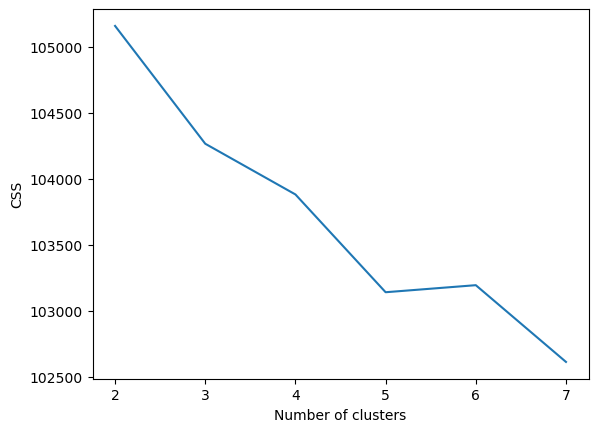

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(2, 8), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

We observe some most spoken Key Features are common between clusters. We can see that the elbow effect starts from K=5. Let us build a model for K=5.

In [27]:
NUM_CLUSTERS = 5
km2 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
# Adding Cluster levels in the original dataframe 
df['kmeans_cluster'] = km2.labels_

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 15
ordered_centroids = km2.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Key Features: ['new', 'york', 'new york', 'city', 'york city', 'one', 'world', 'life', 'young', 'family', 'man', 'get', 'love', 'two', 'years']
Popular Movies: ['Teenage Mutant Ninja Turtles', 'Pixels', 'The Dark Knight Rises', 'The Godfather: Part II', 'How to Train Your Dragon 2', '12 Years a Slave', 'The Wolf of Wall Street', 'The Amazing Spider-Man 2', 'The Devil Wears Prada', 'Non-Stop', 'Home Alone 2: Lost in New York', 'Captain America: The Winter Soldier', 'I Am Legend', 'Mission: Impossible III', 'King Kong', 'The Expendables 3', 'Fantastic 4: Rise of the Silver Surfer', 'The Godfather: Part III', 'Taxi Driver', 'Beetlejuice']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['two', 'one', 'love', 'young', 'story', 'get', 'men', 'find', 'years', 'world', 'life', 'together', 'must', 'man', 'new']
Popular Movies: ['Captain America: Civil War', 'X-Men: Days of Future Past', 'Men in Black', 'Aladdin', 'Thor', 'Se7

NUM_CLUSTERS = 5: Specifies the number of clusters to create.

km2 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix): Initializes and fits a KMeans clustering model with 5 clusters using the document-term matrix cv_matrix.

df['kmeans_cluster'] = km2.labels_: Adds the cluster labels assigned by KMeans to the original DataFrame df.

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']] ...: Selects columns 'title', 'kmeans_cluster', and 'popularity' from df, sorts the rows by cluster and popularity, selects the top 20 popular movies for each cluster, and stores them in movie_clusters.

feature_names = cv.get_feature_names_out(): Retrieves the feature names from the CountVectorizer object.

topn_features = 15: Sets the number of top features to consider for each cluster.

ordered_centroids = km2.cluster_centers_.argsort()[:, ::-1]: Orders the cluster centroids by their feature values in descending order.

for cluster_num in range(NUM_CLUSTERS):: Iterates over each cluster.

key_features = [feature_names[index] ...: Retrieves the top topn_features key features for the current cluster based on the ordered centroids.

movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist(): Retrieves the titles of popular movies belonging to the current cluster.

Prints the cluster number, key features, and popular movies for each cluster.

There are still some common key features. Let us build a model for K=4.

In [28]:
NUM_CLUSTERS = 4
km2 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(cv_matrix)
# Adding Cluster levels in the original dataframe 
df['kmeans_cluster'] = km2.labels_

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

feature_names = cv.get_feature_names_out()
topn_features = 20
ordered_centroids = km2.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Key Features: ['one', 'world', 'young', 'two', 'story', 'man', 'love', 'find', 'must', 'get', 'time', 'new', 'war', 'friends', 'back', 'years', 'way', 'film', 'help', 'take']
Popular Movies: ['Minions', 'Interstellar', 'Guardians of the Galaxy', 'Jurassic World', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Big Hero 6', 'Terminator Genisys', 'Captain America: Civil War', 'Whiplash', 'The Dark Knight', 'The Martian', 'Batman v Superman: Dawn of Justice', 'Avatar', 'Fight Club', "Pirates of the Caribbean: Dead Man's Chest", 'The Avengers', 'Gone Girl', 'Fury']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['life', 'love', 'one', 'man', 'story', 'young', 'new', 'two', 'world', 'back', 'find', 'time', 'years', 'finds', 'way', 'hes', 'woman', 'must', 'get', 'death']
Popular Movies: ['Deadpool', 'Mad Max: Fury Road', 'Inception', 'The

You can name the four clusters according to your understanding. 
The four cluster may be named in this case as:
    
1) Exploration related movies 
2) Life-philogophy related movies 
3) War related movies 
4) 'new york' based movies 

### Use TF-IDF vectorizer for clustering 